# Healthcare Analysis

# Imports

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix
from sklearn.metrics import roc_curve as sklearn_roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

# Functions

In [32]:
def check_nulls_dupes(df):
  print(f"The amount of Nulls: {df.isna().sum()}")
  print(f"The amount of Dupes {df.duplicated().sum()}")

def check_class_imbalance(target):
  
  unique, counts = np.unique(target, return_counts=True)
  
  plt.figure(figsize=(10, 7))
  plt.pie(counts, labels= unique, startangle=140, autopct="%1.1f%%")
  plt.title("Target Class Breakdown")
  plt.show()
  
  plt.figure(figsize=(10, 7))
  sns.countplot(x=target)
  plt.title("Target Class Breakdown")
  plt.ylabel("Frequency")
  plt.show()

# EDA Analysis

In [33]:
df = pd.read_csv("/Users/maukanmir/Downloads/data.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


# Check For Null Values

In [34]:
check_nulls_dupes(df)

The amount of Nulls: Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
The amount of Dupes 534


In [35]:
df.drop_duplicates(inplace=True)

# Check Class Imbalance

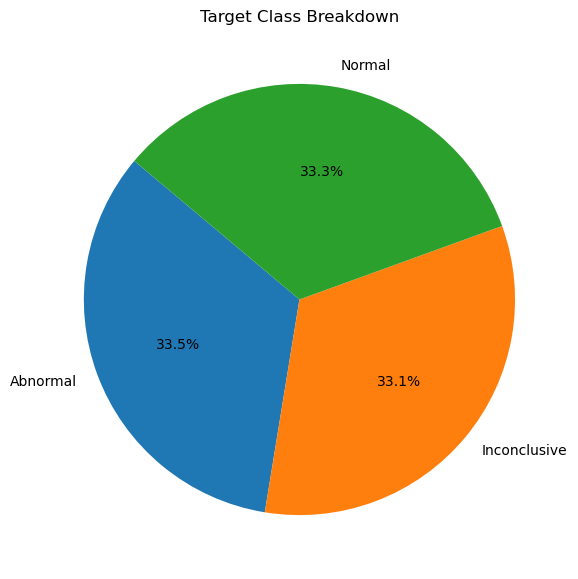

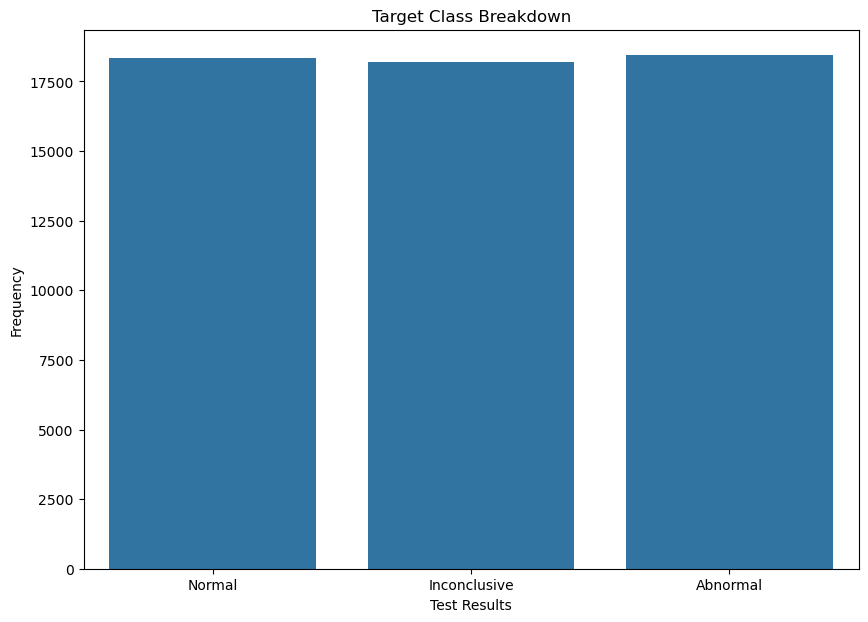

In [36]:
check_class_imbalance(df["Test Results"])

In [37]:
for col in df.select_dtypes(include="object"):
  print(f"{col}")
  print(len(df[col].unique()))

Name
49992
Gender
2
Blood Type
8
Medical Condition
6
Date of Admission
1827
Doctor
40341
Hospital
39876
Insurance Provider
5
Admission Type
3
Discharge Date
1856
Medication
5
Test Results
3


# Feature Engineering

In [38]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [39]:
df["duration"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

In [40]:
df.drop(["Name", "Doctor", "Hospital", "Room Number", "Date of Admission", "Discharge Date"], inplace=True, axis=1)

# Split Numeric and Categorical columns

In [41]:
numeric_types = df.select_dtypes(include=["int64", "float64"])
categorical_types = df.select_dtypes(include="object")

In [42]:
df.dtypes

Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Insurance Provider     object
Billing Amount        float64
Admission Type         object
Medication             object
Test Results           object
duration                int64
dtype: object

In [43]:
df.describe()

,Age,Billing Amount,duration
count,54966.000000,54966.000000,54966.000000
mean,51.535185,25544.306284,15.499290
std,19.605661,14208.409711,8.661471
min,13.000000,-2008.492140,1.000000
25%,35.000000,13243.718641,8.000000
50%,52.000000,25542.749145,15.000000
75%,68.000000,37819.858159,23.000000
max,89.000000,52764.276736,30.000000


# Heatmap

<Axes: >

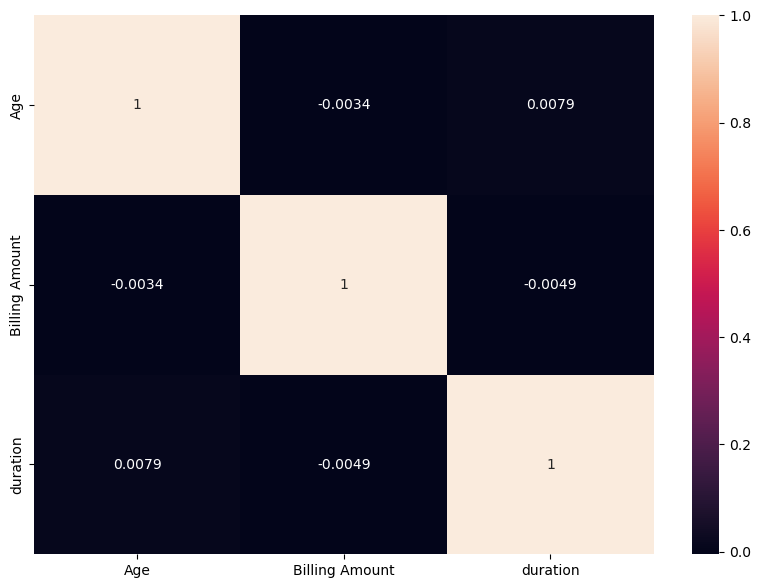

In [45]:
relations = numeric_types.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data=relations, annot=True)